In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
data = 'https://raw.githubusercontent.com/pybites/challenges/solutions/13/movie_metadata.csv'
df   = pd.read_csv(data)
df.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [3]:
# Key Challenge Objectives
# 1. Only consider directors with a minimum of 4 movies, otherwise you get misrepresentative data
# 2. Take movies of year >= 1960
# 3. Print the top 20 highest rated directors with their movies ordered desc on rating

In [4]:
# We only want a subset of all the data from this CSV file
# Selecting only the director's name, movie title, year, and IMDB score
df_sub_list = df[['director_name','movie_title','title_year','imdb_score']]
df_sub_list.head(5)

,director_name,movie_title,title_year,imdb_score
0,James Cameron,Avatar,2009.0,7.9
1,Gore Verbinski,Pirates of the Caribbean: At World's End,2007.0,7.1
2,Sam Mendes,Spectre,2015.0,6.8
3,Christopher Nolan,The Dark Knight Rises,2012.0,8.5
4,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,NaN,7.1


In [5]:
# There's a lot of missing data, so we'll drop all of that for better analysis
df_dropna = df_sub_list.dropna()
df_directors = df_dropna[['director_name','movie_title']]
df_directors.head(5)

,director_name,movie_title
0,James Cameron,Avatar
1,Gore Verbinski,Pirates of the Caribbean: At World's End
2,Sam Mendes,Spectre
3,Christopher Nolan,The Dark Knight Rises
5,Andrew Stanton,John Carter


In [6]:
# The output for year and score need to be changed to int and float, respectively
df_cleaned_year = df_dropna[['title_year']].astype(int)
df_cleaned_score = df_dropna[['imdb_score']].astype(float)

In [7]:
# Now we concatinate our DataFrames to get a single DataFrame with all the cleaned up data
df_cleaned_concat = pd.concat([df_directors, df_cleaned_year,df_cleaned_score],axis=1)
df_cleaned_concat.head(5)

,director_name,movie_title,title_year,imdb_score
0,James Cameron,Avatar,2009,7.9
1,Gore Verbinski,Pirates of the Caribbean: At World's End,2007,7.1
2,Sam Mendes,Spectre,2015,6.8
3,Christopher Nolan,The Dark Knight Rises,2012,8.5
5,Andrew Stanton,John Carter,2012,6.6


In [8]:
# Leverage numpy to transform the imdb_score column into an average rating
df_cleaned_concat['Average_Rating'] = df_cleaned_concat.groupby('director_name')['imdb_score'].transform(np.mean)

In [9]:
# Round the data to only two decimal points
df_final = df_cleaned_concat.round(2)
df_final.head(5)

,director_name,movie_title,title_year,imdb_score,Average_Rating
0,James Cameron,Avatar,2009,7.9,7.91
1,Gore Verbinski,Pirates of the Caribbean: At World's End,2007,7.1,6.99
2,Sam Mendes,Spectre,2015,6.8,7.50
3,Christopher Nolan,The Dark Knight Rises,2012,8.5,8.43
5,Andrew Stanton,John Carter,2012,6.6,7.73


In [10]:
# We only want to review movies that are made after 1960
# After we've established a variable with only after 1960 movies we then filter our dataframe by only those records
after_1960 = df_final['title_year'] > 1960
df_final2 = df_final[after_1960]
df_final2.head(5)

,director_name,movie_title,title_year,imdb_score,Average_Rating
0,James Cameron,Avatar,2009,7.9,7.91
1,Gore Verbinski,Pirates of the Caribbean: At World's End,2007,7.1,6.99
2,Sam Mendes,Spectre,2015,6.8,7.50
3,Christopher Nolan,The Dark Knight Rises,2012,8.5,8.43
5,Andrew Stanton,John Carter,2012,6.6,7.73


In [11]:
# Sort all the values first by Average Rating and then by the IMDB Score in descending order
# Output only the top 20
df_final3 = df_final2.sort_values(['Average_Rating','imdb_score'], ascending=[False,False])
df_final3.head(20)

,director_name,movie_title,title_year,imdb_score,Average_Rating
4372,Mitchell Altieri,A Beginner's Guide to Snuff,2016,8.7,8.70
4468,Sadyk Sher-Niyaz,Queen of the Mountains,2014,8.7,8.70
4924,Cary Bell,Butterfly Girl,2014,8.7,8.70
3816,Mike Mayhall,Running Forever,2015,8.6,8.60
3870,Raja Menon,Airlift,2016,8.5,8.50
3931,Ron Fricke,Samsara,2011,8.5,8.50
4028,Damien Chazelle,Whiplash,2014,8.5,8.50
4921,Majid Majidi,Children of Heaven,1997,8.5,8.50
4498,Sergio Leone,"The Good, the Bad and the Ugly",1966,8.9,8.48
3766,Sergio Leone,Once Upon a Time in the West,1968,8.6,8.48


In [12]:
# Need to add a column called count and auto-fill that column with 1. We'll use this to count up the total movies
# each director has produced.
# Next we groupby(director name) and then run a sum of the count on our new column
df_final3['Count'] = 1
df_final4 = df_final3.groupby(['director_name'])['Count'].sum()

In [13]:
# Confirm our new output is a Series
type(df_final4)

pandas.core.series.Series

In [14]:
# We have to convert the Series to a DataFrame in order to use the merge feature
# Merge the two DataFrames on the director_name column
# Print to Confirm our work
df_final4 = pd.DataFrame(df_final4)
df_final5 = pd.merge(df_final3,df_final4, on='director_name')
df_final5.head(20)

,director_name,movie_title,title_year,imdb_score,Average_Rating,Count_x,Count_y
0,Mitchell Altieri,A Beginner's Guide to Snuff,2016,8.7,8.70,1,1
1,Sadyk Sher-Niyaz,Queen of the Mountains,2014,8.7,8.70,1,1
2,Cary Bell,Butterfly Girl,2014,8.7,8.70,1,1
3,Mike Mayhall,Running Forever,2015,8.6,8.60,1,1
4,Raja Menon,Airlift,2016,8.5,8.50,1,1
5,Ron Fricke,Samsara,2011,8.5,8.50,1,1
6,Damien Chazelle,Whiplash,2014,8.5,8.50,1,1
7,Majid Majidi,Children of Heaven,1997,8.5,8.50,1,1
8,Sergio Leone,"The Good, the Bad and the Ugly",1966,8.9,8.48,1,4
9,Sergio Leone,Once Upon a Time in the West,1968,8.6,8.48,1,4


In [15]:
# Now we need to delete the row Count_x as that's our original row of auto-filled 1s
# We'll rename our Count_y to Total_Movies
df_final5 = df_final5.drop(['Count_x'], axis=1)
df_final5.columns = ['Director_Name','Movie_Title','Year','IMDB_Score','Avg_Rating','Total_Movies']
df_final5.head(20)

,Director_Name,Movie_Title,Year,IMDB_Score,Avg_Rating,Total_Movies
0,Mitchell Altieri,A Beginner's Guide to Snuff,2016,8.7,8.70,1
1,Sadyk Sher-Niyaz,Queen of the Mountains,2014,8.7,8.70,1
2,Cary Bell,Butterfly Girl,2014,8.7,8.70,1
3,Mike Mayhall,Running Forever,2015,8.6,8.60,1
4,Raja Menon,Airlift,2016,8.5,8.50,1
5,Ron Fricke,Samsara,2011,8.5,8.50,1
6,Damien Chazelle,Whiplash,2014,8.5,8.50,1
7,Majid Majidi,Children of Heaven,1997,8.5,8.50,1
8,Sergio Leone,"The Good, the Bad and the Ugly",1966,8.9,8.48,4
9,Sergio Leone,Once Upon a Time in the West,1968,8.6,8.48,4


In [16]:
# We filter on Total_Movies and only want to see the Directors who have produced more than 4 movies
# Output the top 20 results to confirm
df_final6 = df_final5[df_final5['Total_Movies'] > 4]
df_final6.head(20)

,Director_Name,Movie_Title,Year,IMDB_Score,Avg_Rating,Total_Movies
12,Christopher Nolan,The Dark Knight,2008,9.0,8.43,8
13,Christopher Nolan,Inception,2010,8.8,8.43,8
14,Christopher Nolan,Interstellar,2014,8.6,8.43,8
15,Christopher Nolan,The Dark Knight Rises,2012,8.5,8.43,8
16,Christopher Nolan,The Prestige,2006,8.5,8.43,8
17,Christopher Nolan,Memento,2000,8.5,8.43,8
18,Christopher Nolan,Batman Begins,2005,8.3,8.43,8
19,Christopher Nolan,Insomnia,2002,7.2,8.43,8
42,Quentin Tarantino,Pulp Fiction,1994,8.9,8.20,8
43,Quentin Tarantino,Django Unchained,2012,8.5,8.20,8


In [17]:
# Challenge completed!
# It took me six dataframes to finalize this challenge. Will review in a few days to attempt to cut down on the
# number of DF changes needed
df_final6.sort_values(['Total_Movies', 'Avg_Rating'], ascending=[False,False]).head(20)

,Director_Name,Movie_Title,Year,IMDB_Score,Avg_Rating,Total_Movies
449,Steven Spielberg,Schindler's List,1993,8.9,7.48,26
450,Steven Spielberg,Saving Private Ryan,1998,8.6,7.48,26
451,Steven Spielberg,Raiders of the Lost Ark,1981,8.5,7.48,26
452,Steven Spielberg,Indiana Jones and the Last Crusade,1989,8.3,7.48,26
453,Steven Spielberg,Jurassic Park,1993,8.1,7.48,26
454,Steven Spielberg,Catch Me If You Can,2002,8.0,7.48,26
455,Steven Spielberg,Jaws,1975,8.0,7.48,26
456,Steven Spielberg,E.T. the Extra-Terrestrial,1982,7.9,7.48,26
457,Steven Spielberg,The Color Purple,1985,7.8,7.48,26
458,Steven Spielberg,Minority Report,2002,7.7,7.48,26


In [18]:
df_final6.describe()

,Year,IMDB_Score,Avg_Rating,Total_Movies
count,1647.000000,1647.000000,1647.000000,1647.000000
mean,2001.811172,6.662538,6.663777,8.846995
std,10.093917,0.979740,0.646753,4.434445
min,1962.000000,1.600000,3.720000,5.000000
25%,1997.000000,6.100000,6.230000,6.000000
50%,2004.000000,6.700000,6.710000,7.000000
75%,2009.000000,7.400000,7.110000,11.000000
max,2016.000000,9.200000,8.430000,26.000000


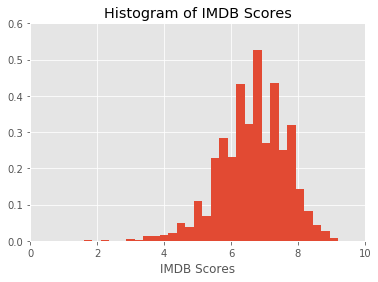

In [35]:
# Histogram Display of the IMDB Scores
%matplotlib inline
plt.xlabel('IMDB Scores')
plt.title('Histogram of IMDB Scores')
plt.axis([0, 10, 0, .6])
plt.grid(True)
plt.hist(df_final6['IMDB_Score'], density=True,bins=30)
plt.show()